## 0. Import libraries

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline

## 1. import data

In [3]:
tripdata_2019_jan = pd.read_csv('data/yellow_tripdata_2019-01.csv')
tripdata = pd.concat([tripdata_2019_jan])

In [4]:
tripdata.shape

(7667792, 18)

In [5]:
tripdata.sample(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
3397032,2,2019-01-15 11:48:38,2019-01-15 12:13:52,1,3.02,1,N,231,170,1,17.0,0.0,0.5,3.56,0.0,0.3,21.36,NaN
6130077,2,2019-01-26 00:26:11,2019-01-26 00:39:14,2,2.02,1,N,48,229,1,10.5,0.5,0.5,1.77,0.0,0.3,13.57,0.0
2687650,2,2019-01-12 13:28:33,2019-01-12 13:36:26,1,1.06,1,N,237,262,1,7.0,0.0,0.5,1.56,0.0,0.3,9.36,NaN
1443693,2,2019-01-07 17:59:10,2019-01-07 18:08:51,1,2.61,1,N,13,68,2,10.5,1.0,0.5,0.00,0.0,0.3,12.30,NaN
2500798,1,2019-01-11 19:59:04,2019-01-11 20:05:09,1,1.10,1,N,146,7,2,6.5,0.5,0.5,0.00,0.0,0.3,7.80,NaN


## 2. Data Exploration

In [6]:
tripdata.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [7]:
tripdata = tripdata[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID','PULocationID', 'DOLocationID',
       'payment_type','total_amount']]

In [8]:
tripdata.head(5)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55


array([[<Axes: title={'center': 'passenger_count'}>,
        <Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>],
       [<Axes: title={'center': 'PULocationID'}>,
        <Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>],
       [<Axes: title={'center': 'total_amount'}>, <Axes: >, <Axes: >]],
      dtype=object)

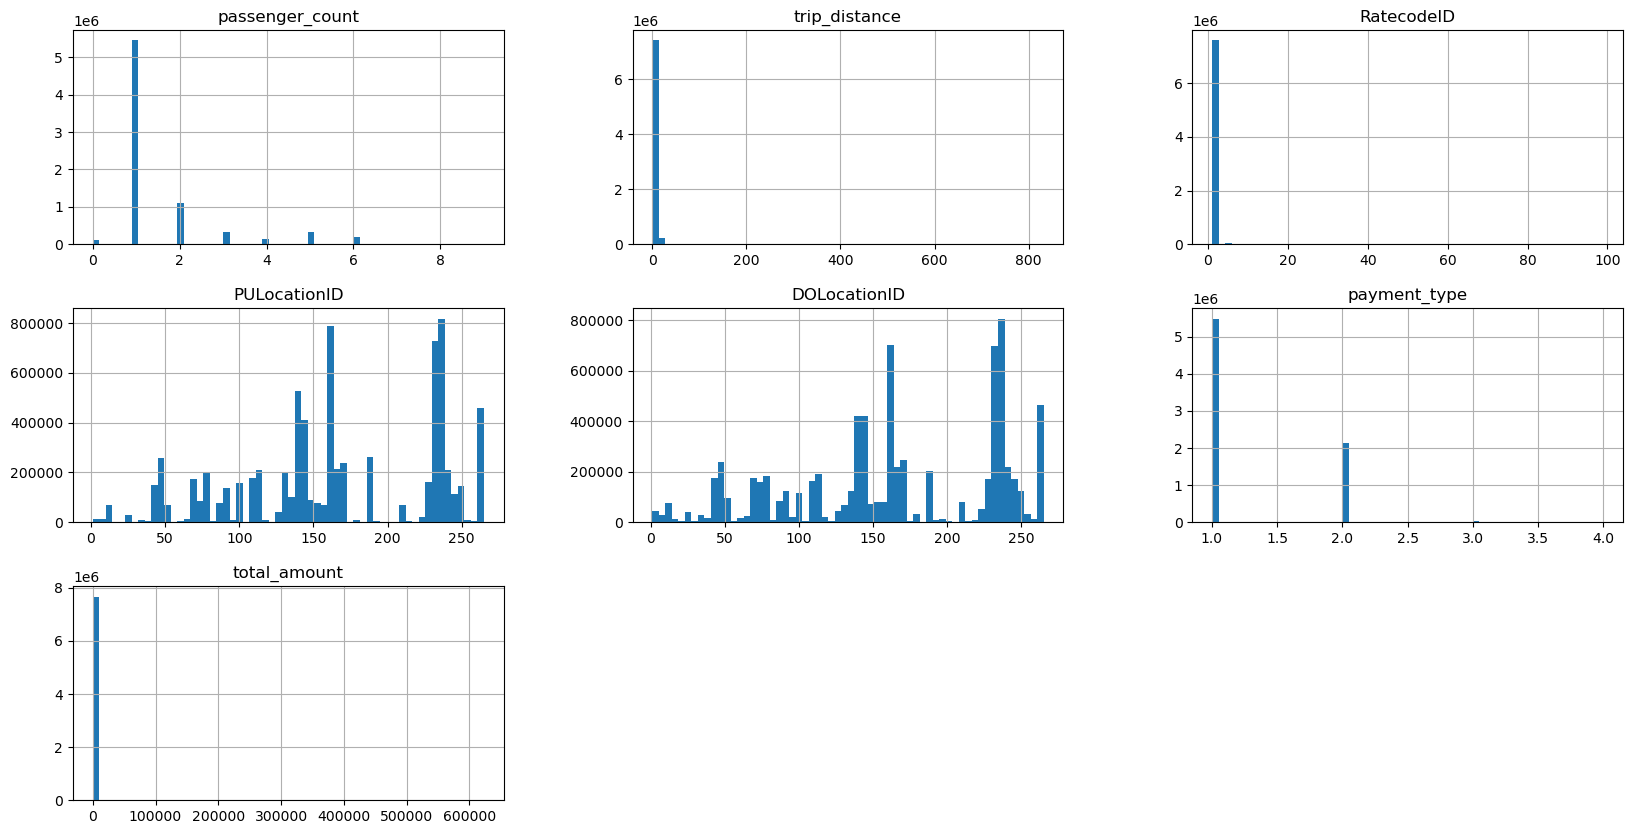

In [9]:
tripdata.hist(figsize=(20,10), bins=60)

In [10]:
tripdata['RatecodeID'].value_counts()

RatecodeID
1     7430139
2      166090
5       54569
3       11801
4        4895
99        252
6          46
Name: count, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

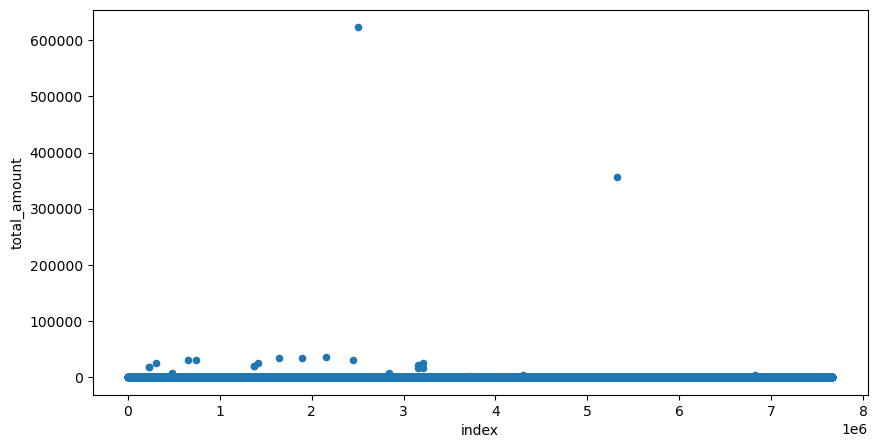

In [11]:
tripdata.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

<Axes: xlabel='index', ylabel='total_amount'>

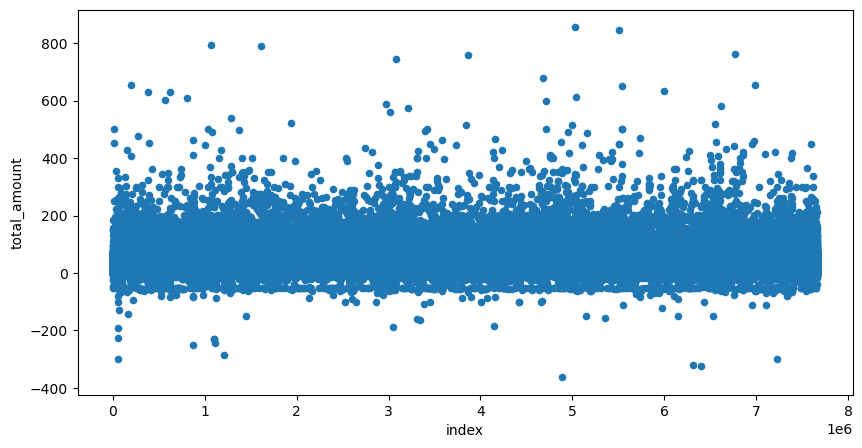

In [12]:
tripdata[tripdata['total_amount']<1000].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

(7131, 9)


<Axes: xlabel='index', ylabel='total_amount'>

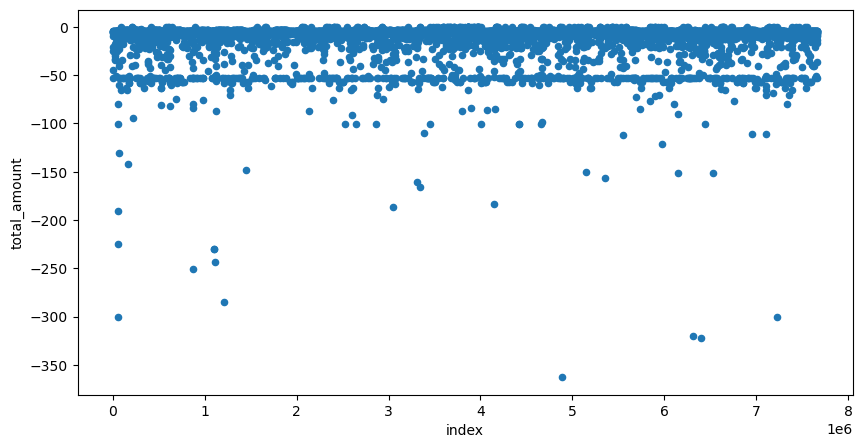

In [13]:
print(tripdata[tripdata['total_amount']<0].shape)
tripdata[tripdata['total_amount']<0].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10, 5))

In [14]:
tripdata[tripdata['total_amount']<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
663,2019-01-01 00:32:56,2019-01-01 00:33:35,2,0.10,1,148,148,3,-3.8
2402,2019-01-01 00:14:18,2019-01-01 00:40:55,1,4.13,1,170,238,4,-20.3
2541,2019-01-01 00:31:27,2019-01-01 00:42:39,1,1.35,1,162,234,4,-9.8
2544,2019-01-01 00:45:57,2019-01-01 00:46:07,1,0.00,1,234,234,4,-3.8
2547,2019-01-01 00:48:35,2019-01-01 00:49:59,1,0.16,1,234,234,4,-4.3


In [15]:
tripdata[tripdata['total_amount']<0]['payment_type'].value_counts()

payment_type
3    4088
4    2666
2     376
1       1
Name: count, dtype: int64

<Axes: >

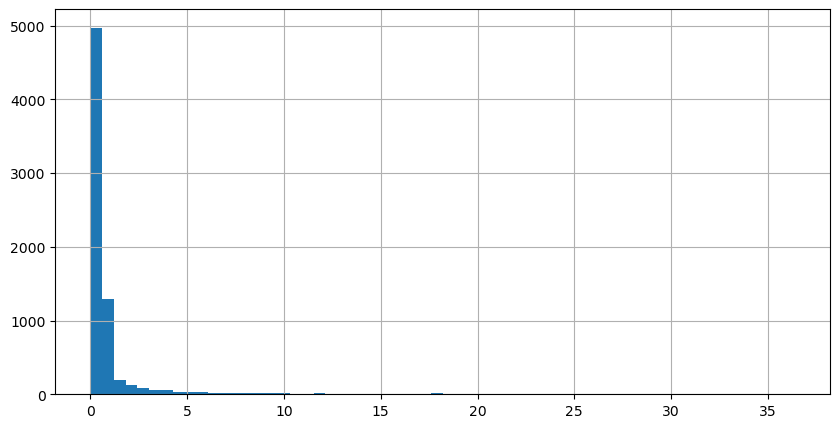

In [16]:
tripdata[tripdata['total_amount']<0]['trip_distance'].hist(bins=60, figsize=(10,5))

In [17]:
print(tripdata[tripdata['total_amount']==0].shape)
tripdata[tripdata['total_amount']==0].head()

(1414, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
3552,2019-01-01 00:18:46,2019-01-01 00:18:46,1,0.0,5,186,264,2,0.0
9138,2019-01-01 00:41:47,2019-01-01 00:41:47,1,0.0,5,246,264,2,0.0
13256,2019-01-01 00:19:38,2019-01-01 00:20:35,1,0.0,1,193,193,1,0.0
13257,2019-01-01 00:43:34,2019-01-01 00:43:34,1,0.0,1,7,7,2,0.0
13258,2019-01-01 00:02:52,2019-01-01 00:02:52,1,0.0,1,264,7,2,0.0


In [18]:
tripdata[tripdata['total_amount']==0]['payment_type'].value_counts()

payment_type
1    815
2    569
3     29
4      1
Name: count, dtype: int64

<Axes: >

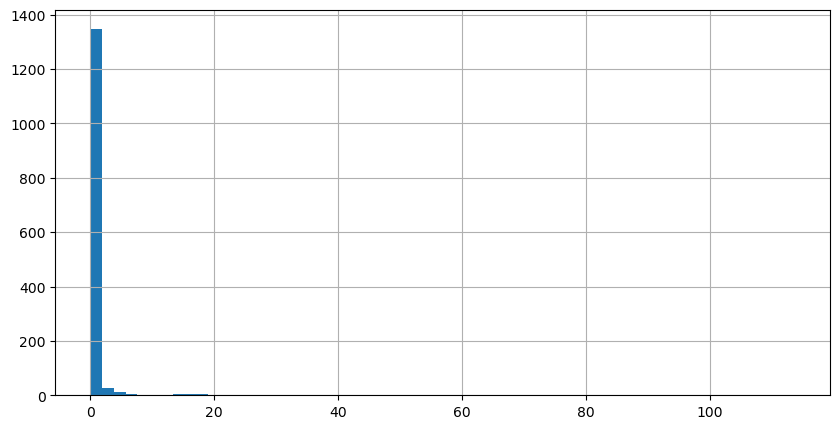

In [19]:
tripdata[tripdata['total_amount']==0]['trip_distance'].hist(bins=60, figsize=(10,5))

In [20]:
tripdata[tripdata['total_amount']==0]['trip_distance'].value_counts()

trip_distance
0.00     1270
1.00        4
0.02        4
0.01        4
0.10        3
         ... 
0.59        1
10.84       1
2.91        1
1.20        1
0.53        1
Name: count, Length: 110, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

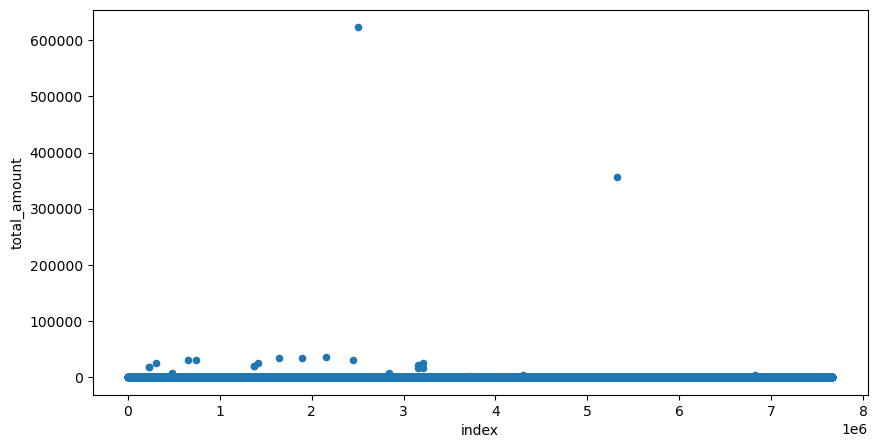

In [21]:
tripdata.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

In [22]:
tripdata[tripdata['total_amount']>200].shape

(1166, 9)

In [23]:
tripdata['total_amount'].mean()

15.68222215991253

## 3. Data Cleaning

In [24]:
tripdata2 = tripdata[(tripdata['total_amount']>=0) & (tripdata['total_amount']<200)]

In [25]:
print(tripdata.shape)
tripdata2.shape

(7667792, 9)


(7659490, 9)

In [26]:
tripdata2.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

## 4. Data Preparation

In [28]:
trip_data_final = tripdata2.copy()

In [29]:
trip_data_final.dtypes

tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
PULocationID               int64
DOLocationID               int64
payment_type               int64
total_amount             float64
dtype: object

In [30]:
#trip_data_final.loc[:,'tpep_pickup_datetime'] = pd.to_datetime(trip_data_final.loc[:,'tpep_pickup_datetime'])
#trip_data_final.loc[:,'tpep_dropoff_datetime'] = pd.to_datetime(trip_data_final.loc[:,'tpep_dropoff_datetime'])

In [33]:
trip_data_final.loc[:,'RatecodeID'] = trip_data_final['RatecodeID'].astype(str)
trip_data_final.loc[:,'PULocationID'] = trip_data_final['PULocationID'].astype(str)
trip_data_final.loc[:,'DOLocationID'] = trip_data_final['DOLocationID'].astype(str)
trip_data_final.loc[:,'payment_type'] = trip_data_final['payment_type'].astype(str)

In [34]:
trip_data_final.dtypes

tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                object
PULocationID              object
DOLocationID              object
payment_type              object
total_amount             float64
dtype: object

In [35]:
trip_data_final.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55


In [44]:
trip_data_final['tpep_pickup_datetime'] = pd.to_datetime(trip_data_final['tpep_pickup_datetime'])
trip_data_final['tpep_dropoff_datetime'] = pd.to_datetime(trip_data_final['tpep_dropoff_datetime'])

In [45]:
trip_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7659490 entries, 0 to 7667791
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   tpep_dropoff_datetime  datetime64[ns]
 2   passenger_count        int64         
 3   trip_distance          float64       
 4   RatecodeID             object        
 5   PULocationID           object        
 6   DOLocationID           object        
 7   payment_type           object        
 8   total_amount           float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 584.4+ MB


In [46]:
trip_data_final.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55


In [47]:
trip_data_final['transaction_date'] = pd.to_datetime(trip_data_final['tpep_pickup_datetime'].dt.date)

In [48]:
trip_data_final['transaction_year'] = trip_data_final['tpep_pickup_datetime'].dt.year
trip_data_final['transaction_month'] = trip_data_final['tpep_pickup_datetime'].dt.month
trip_data_final['transaction_day'] = trip_data_final['tpep_pickup_datetime'].dt.day
trip_data_final['transaction_hour'] = trip_data_final['tpep_pickup_datetime'].dt.hour

In [49]:
trip_data_final.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95,2019-01-01,2019,1,1,0
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30,2019-01-01,2019,1,1,0
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80,2018-12-21,2018,12,21,13
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55,2018-11-28,2018,11,28,15
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55,2018-11-28,2018,11,28,15


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': 'transaction_date'}>],
       [<Axes: title={'center': 'transaction_year'}>,
        <Axes: title={'center': 'transaction_month'}>,
        <Axes: title={'center': 'transaction_day'}>],
       [<Axes: title={'center': 'transaction_hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

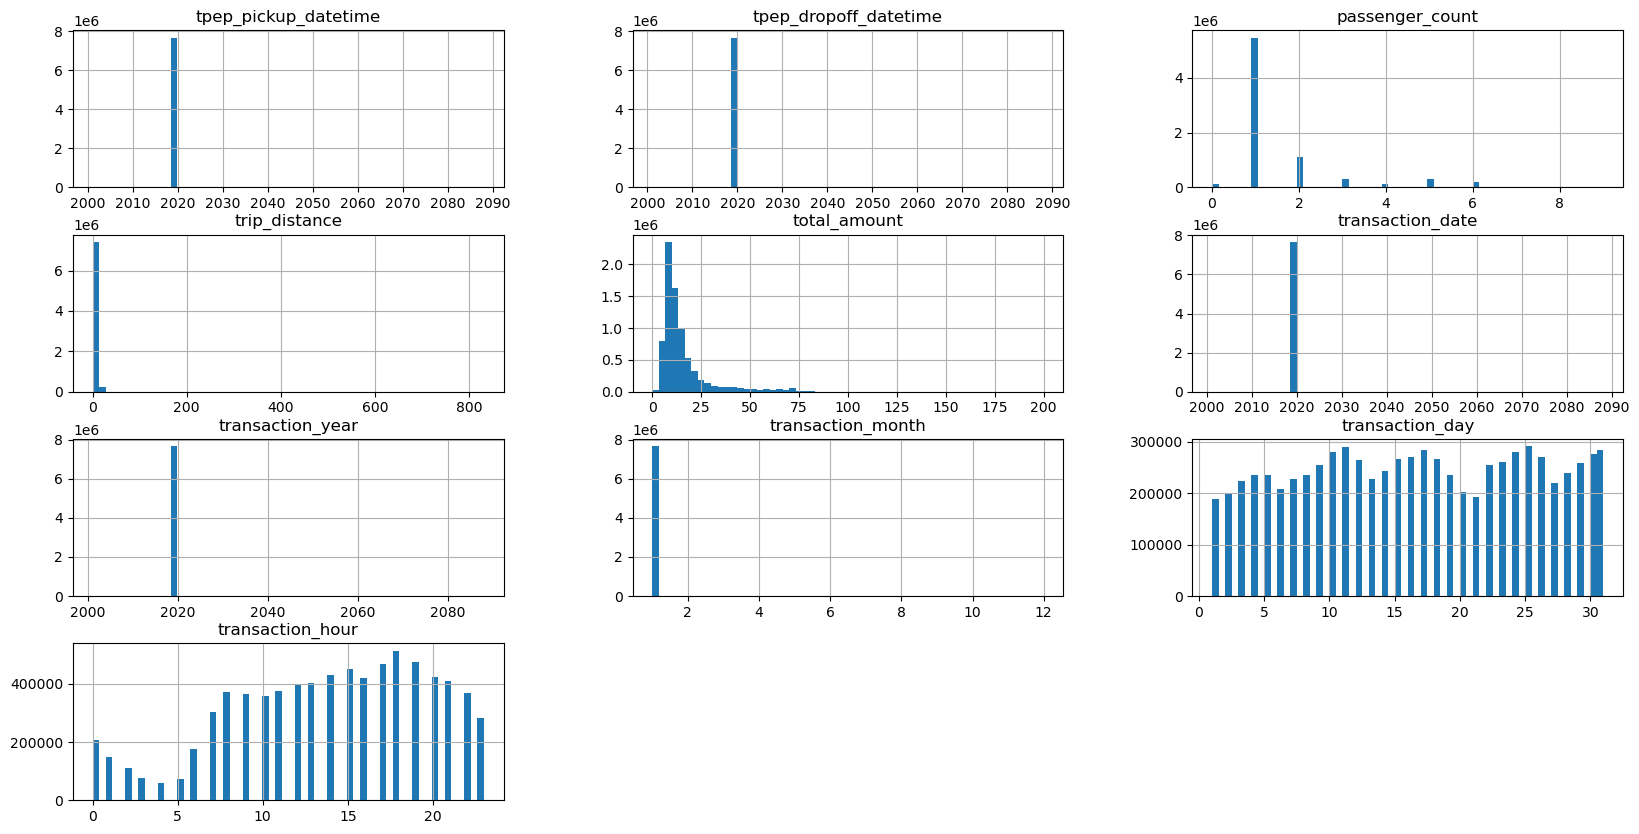

In [50]:
trip_data_final.hist(figsize=(20,10), bins=60)

In [51]:
trip_data_final = trip_data_final[trip_data_final['transaction_year']==2019]
trip_data_final = trip_data_final[trip_data_final['transaction_month']==1]

array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': 'transaction_date'}>],
       [<Axes: title={'center': 'transaction_year'}>,
        <Axes: title={'center': 'transaction_month'}>,
        <Axes: title={'center': 'transaction_day'}>],
       [<Axes: title={'center': 'transaction_hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

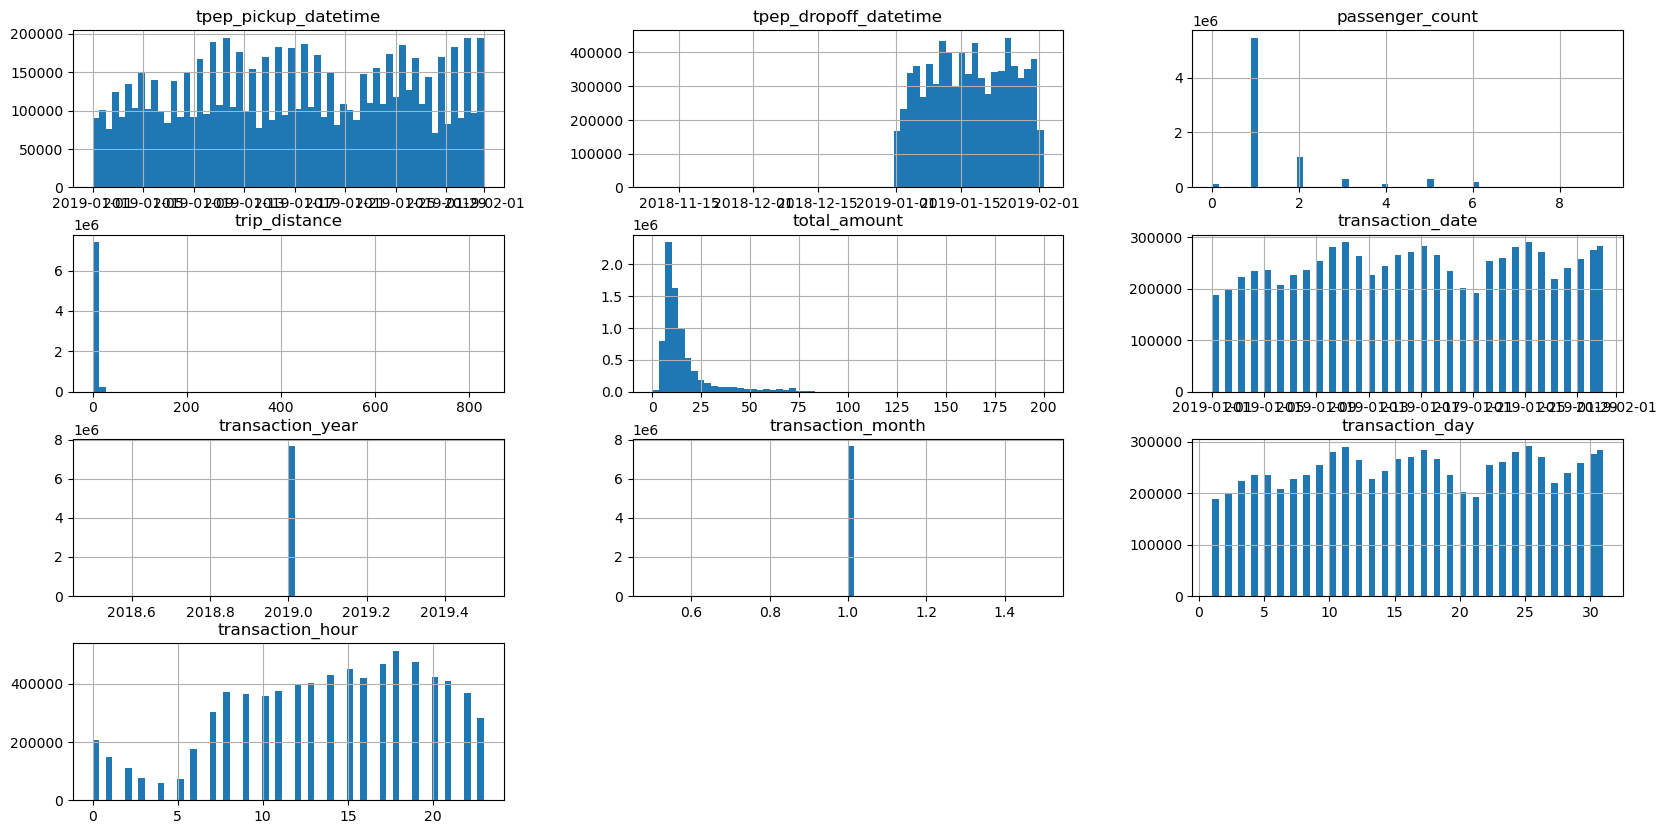

In [52]:
trip_data_final.hist(figsize=(20,10), bins=60)

In [53]:
# Problem Statement: Predict the average money people spend for a cab ride in NY in a certain region per hour

In [54]:
categorical_cols = ['PULocationID','transaction_date','transaction_month','transaction_day','transaction_hour']
numerical_cols = ['trip_distance','total_amount']
all_needed_cols = categorical_cols + numerical_cols

In [55]:
trip_data_final_new = trip_data_final[all_needed_cols]
print(trip_data_final_new.shape)
trip_data_final_new.head()

(7658954, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,151,2019-01-01,1,1,0,1.5,9.95
1,239,2019-01-01,1,1,0,2.6,16.30
7,163,2019-01-01,1,1,0,1.3,9.05
8,229,2019-01-01,1,1,0,3.7,18.50
9,141,2019-01-01,1,1,0,2.1,13.00


In [56]:
trip_by_region = trip_data_final_new.groupby(categorical_cols).mean().reset_index()

In [58]:
trip_by_region['count_of_transactions'] = trip_data_final_new.groupby(categorical_cols).count().reset_index()['total_amount']
print(trip_by_region.shape)
trip_by_region.head()

(102556, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


<Axes: >

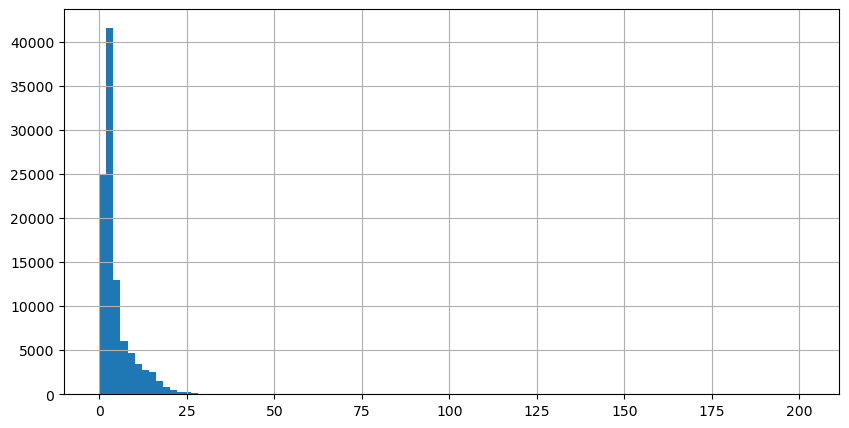

In [59]:
trip_by_region['trip_distance'].hist(bins=100, figsize=(10,5))

<Axes: >

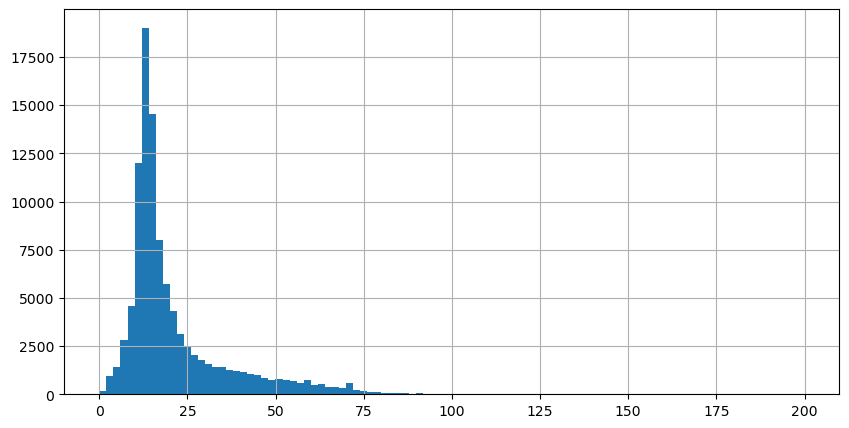

In [60]:
trip_by_region['total_amount'].hist(bins=100, figsize=(10,5))

In [62]:
trip_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7658954 entries, 0 to 7667791
Data columns (total 14 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   tpep_dropoff_datetime  datetime64[ns]
 2   passenger_count        int64         
 3   trip_distance          float64       
 4   RatecodeID             object        
 5   PULocationID           object        
 6   DOLocationID           object        
 7   payment_type           object        
 8   total_amount           float64       
 9   transaction_date       datetime64[ns]
 10  transaction_year       int32         
 11  transaction_month      int32         
 12  transaction_day        int32         
 13  transaction_hour       int32         
dtypes: datetime64[ns](3), float64(2), int32(4), int64(1), object(4)
memory usage: 759.6+ MB
